In [1]:
import ast
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns
from adjustText import adjust_text

df = pd.read_csv('/Users/andreawei/Documents/Learnings/Python Project/Datasets/jobs_data_final.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.dropna(subset='salary_standardized')

/opt/anaconda3/envs/Project1.0/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Finding job counts and median salary trend by region

df_state = df.groupby('state').agg(median_salary = ('salary_standardized', 'median'), job_count = ('job_title', 'count'))
df_state

,median_salary,job_count
state,,
AR,100000.0,1001
Anywhere,93600.0,16241
CA,90000.0,55
CO,87050.0,1809
KS,96500.0,1877
MO,75550.0,2224
NE,35796.8,2
NE,95000.0,4
NJ,60299.2,8


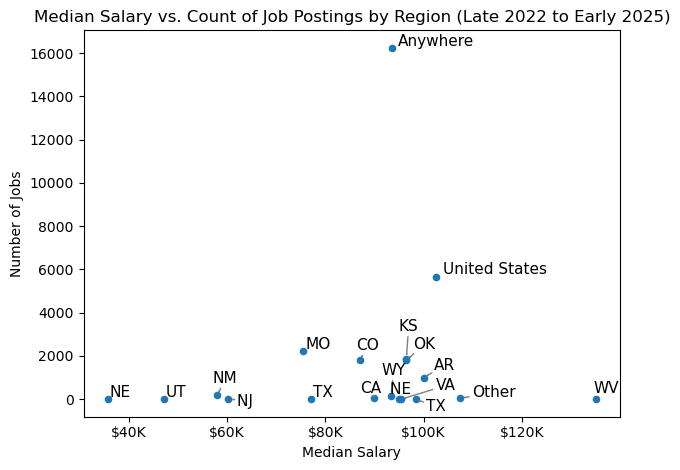

In [3]:
df_state.plot(kind='scatter', x='median_salary', y='job_count')

txts = []
for i, txt in enumerate(df_state.index):
    txts.append(plt.text(df_state['median_salary'].iloc[i], df_state['job_count'].iloc[i], txt, fontsize=11))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='gray'))

xs_format = lambda x, pos: f'${int(x/1000)}K'
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(xs_format))

plt.title('Median Salary vs. Count of Job Postings by Region (Late 2022 to Early 2025)')
plt.xlabel('Median Salary')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()